# Librerias y conexión a drive

In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Abriendo los archivos

## Shapefile

In [4]:
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica)

In [5]:
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)

In [6]:
lago_titicaca.crs

<Derived Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")

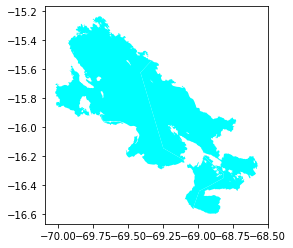

In [8]:
lago_titicaca.plot(facecolor="aqua")

## NETCDF

In [9]:
ruta_tmax = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/PISCO_temperature/tx/PISCOdtx_v1.1.nc"
PISCO_tmax = xr.open_dataset(ruta_tmax)
PISCO_tmax

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 13149)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2016-12-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [10]:
ruta_pp = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov2p1(prec).nc"
PISCO_pp = xr.open_dataset(ruta_pp,decode_times=False)
PISCO_pp

<xarray.Dataset>
Dimensions:  (X: 133, T: 432, Y: 198)
Coordinates:
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 0.95 0.85 0.75 0.65 ... -18.45 -18.55 -18.65 -18.75
Data variables:
    Prec     (T, Y, X) float32 ...

In [11]:
PISCO_pp=PISCO_pp.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_pp #corregir el tema de las coordenadas

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 432, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) float32 252.5 253.5 254.5 255.5 ... 681.5 682.5 683.5
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [12]:
PISCO_pp["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
PISCO_pp 

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 432, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2016-12-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [13]:
ruta_tmin = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/PISCO/piscov1p1(tmin).nc"
PISCO_tmin = xr.open_dataset(ruta_tmin, decode_times=False)
PISCO_tmin

<xarray.Dataset>
Dimensions:  (T: 432, Y: 202, X: 145)
Coordinates:
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 1.35 1.25 1.15 1.05 ... -18.45 -18.55 -18.65 -18.75
  * X        (X) float32 -81.45 -81.35 -81.25 -81.15 ... -67.25 -67.15 -67.05
Data variables:
    tmin     (T, Y, X) float32 ...

In [14]:
PISCO_tmin = PISCO_tmin.rename({"X":"longitude","Y":"latitude","T":"time"})
PISCO_tmin #corregir el tema de las coordenadas

<xarray.Dataset>
Dimensions:    (time: 432, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) float32 252.5 253.5 254.5 255.5 ... 681.5 682.5 683.5
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [15]:
PISCO_tmin["time"] = pd.date_range(start="1981-01-01",freq="1M", periods= 432)
PISCO_tmin

<xarray.Dataset>
Dimensions:    (time: 432, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-31 1981-02-28 ... 2016-12-31
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

#Figura 2a: Diagrama clim

## Temp maxima

In [16]:
tmax_filtro=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmax_filtro

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 10592)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-06-01 1981-06-02 ... 2010-05-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [17]:
tmax_clim = tmax_filtro.groupby('time.month').mean(dim='time')
tmax_clim

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, month: 12)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tx         (month, latitude, longitude) float32 nan nan nan ... 16.16 14.27
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [18]:
tmax_graph = tmax_clim.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmax_graph

<xarray.Dataset>
Dimensions:    (longitude: 60, latitude: 61, month: 12)
Coordinates:
  * longitude  (longitude) float64 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * latitude   (latitude) float64 -12.55 -12.65 -12.75 ... -18.35 -18.45 -18.55
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tx         (month, latitude, longitude) float32 19.83 23.36 ... 17.87 17.53
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [19]:
len(tmax_graph["tx"])

12

In [20]:
tmax_graph.to_dataframe()

tx
longitude latitude month           
-73.45    -12.55   1      19.828377
                   2      20.058746
                   3      19.684597
                   4      19.311768
                   5      18.152796
...                             ...
-67.55    -18.55   8      14.045212
                   9      15.590877
                   10     17.180939
                   11     17.837063
                   12     17.527582

[43920 rows x 1 columns]

In [21]:
tmax_monthly = tmax_graph.mean(dim=("latitude","longitude")).tx
tmax_monthly

<xarray.DataArray 'tx' (month: 12)>
array([20.617304, 20.656813, 20.85415 , 20.85707 , 20.598726, 19.908365,
       19.889608, 20.819973, 21.422636, 21.916506, 22.013042, 21.385702],
      dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

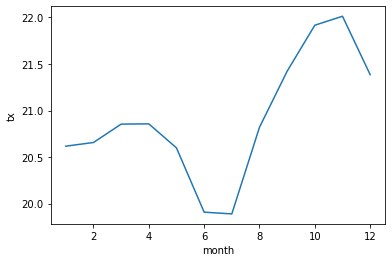

In [22]:
tmax_monthly.plot()

In [23]:
tmax_graph['month'] = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
tmax_graph

<xarray.Dataset>
Dimensions:    (longitude: 60, latitude: 61, month: 12)
Coordinates:
  * longitude  (longitude) float64 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * latitude   (latitude) float64 -12.55 -12.65 -12.75 ... -18.35 -18.45 -18.55
  * month      (month) <U3 'Jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'
Data variables:
    tx         (month, latitude, longitude) float32 19.83 23.36 ... 17.87 17.53
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [24]:
tmax_monthly = tmax_graph.mean(dim=("latitude","longitude"))
tmax_monthly

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) <U3 'Jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'
Data variables:
    tx       (month) float32 20.62 20.66 20.85 20.86 ... 21.42 21.92 22.01 21.39

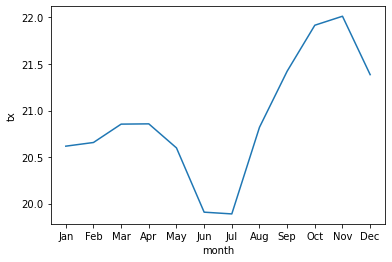

In [25]:
tmax_monthly.tx.plot()

##tmin

In [26]:
tmin_filtro=PISCO_tmin.sel(time=slice('1981-06-01','2010-05-31'))
tmin_filtro

<xarray.Dataset>
Dimensions:    (time: 348, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [27]:
tmin_clim = tmin_filtro.groupby('time.month').mean(dim='time')
tmin_clim

<xarray.Dataset>
Dimensions:    (latitude: 202, longitude: 145, month: 12)
Coordinates:
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tmin       (month, latitude, longitude) float32 nan nan nan ... 3.977 4.597

In [28]:
tmin_graph = tmin_clim.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
tmin_graph

<xarray.Dataset>
Dimensions:    (latitude: 62, longitude: 60, month: 12)
Coordinates:
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -67.75 -67.65 -67.55
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tmin       (month, latitude, longitude) float32 10.92 13.93 ... 2.618 2.724

In [29]:
tmin_monthly = tmin_graph.mean(dim=("latitude","longitude"))
tmin_monthly

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tmin     (month) float32 9.505 9.359 8.825 7.291 ... 4.779 6.372 7.205 8.632

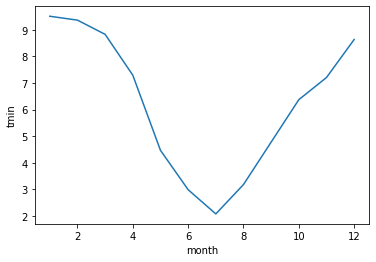

In [30]:
tmin_monthly.tmin.plot()

In [31]:
tmin_monthly["tmin"].to_numpy()

array([9.5054245, 9.359095 , 8.825224 , 7.290928 , 4.469994 , 2.9918795,
       2.0824459, 3.184785 , 4.7794104, 6.372213 , 7.2045507, 8.632057 ],
      dtype=float32)

(0.0, 20.0)

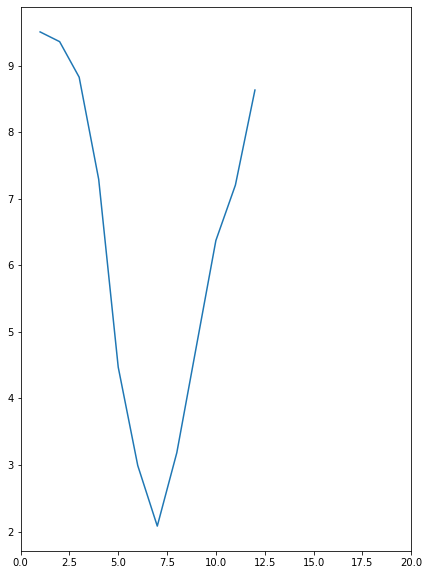

In [32]:
fig, ax = plt.subplots(figsize = (7, 10))

x = np.arange(1,13)
y = tmin_monthly["tmin"].to_numpy()
plt.plot(x,y)
ax.set_xlim(0,20)

##pp

In [33]:
PISCO_pp.Prec.sel(time= slice('1981-06-01', '2010-05-31')).groupby('time.month').mean('time')

<xarray.DataArray 'Prec' (month: 12, latitude: 198, longitude: 133)>
array([[[        nan,         nan,         nan, ..., 255.95047  ,
         187.66405  , 183.18509  ],
        [        nan,         nan,         nan, ..., 281.03244  ,
         220.21686  , 213.95096  ],
        [        nan,         nan,         nan, ..., 318.55765  ,
         267.4996   , 244.50386  ],
        ...,
        [        nan,         nan,         nan, ..., 103.247604 ,
         103.06846  , 103.92185  ],
        [        nan,         nan,         nan, ..., 109.04379  ,
         108.813675 , 102.27101  ],
        [        nan,         nan,         nan, ..., 100.20668  ,
          92.27811  ,  86.04275  ]],

       [[        nan,         nan,         nan, ..., 239.30785  ,
         192.44601  , 187.2756   ],
        [        nan,         nan,         nan, ..., 258.03333  ,
         214.32254  , 222.40645  ],
        [        nan,         nan,         nan, ..., 284.13425  ,
         241.75162  , 230.85168  ],
...
        [        nan,         nan,         nan, ...,   2.064382 ,
           2.2195046,   2.4519649],
        [        nan,         nan,         nan, ...,   2.2474103,
           2.4562368,   5.429836 ],
        [        nan,         nan,         nan, ...,   5.3886466,
           6.1061096,   6.0792785]],

       [[        nan,         nan,         nan, ..., 251.32169  ,
         403.10413  , 531.4703   ],
        [        nan,         nan,         nan, ..., 283.8633   ,
         372.934    , 430.69083  ],
        [        nan,         nan,         nan, ..., 292.385    ,
         310.75552  , 293.37976  ],
        ...,
        [        nan,         nan,         nan, ...,  27.345068 ,
          21.945671 ,  23.31228  ],
        [        nan,         nan,         nan, ...,  19.675562 ,
          19.657816 ,  25.72541  ],
        [        nan,         nan,         nan, ...,  21.414112 ,
          24.292719 ,  29.349659 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:           mm/month
    long_name:       Precipitation
    maxncolor:       254
    ncolor:          254
    colormap:        [null 16777215 16777215 16777215 [16777215 3] 14155730 [...
    colorscalename:  precip_colors
    CS:              0
    scale_min:       0.0

In [34]:
pp_clim = PISCO_pp.sel(time= slice('1981-06-01', '2010-05-31')).groupby('time.month').mean('time')
pp_clim

<xarray.Dataset>
Dimensions:    (longitude: 133, latitude: 198, month: 12)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Prec       (month, latitude, longitude) float32 nan nan nan ... 24.29 29.35

In [35]:
pp_graph = pp_clim.sel(latitude=slice(-12.55,-18.65),
                             longitude=slice(-73.55,-67.55))
pp_graph

<xarray.Dataset>
Dimensions:    (longitude: 55, latitude: 62, month: 12)
Coordinates:
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    Prec       (month, latitude, longitude) float32 211.3 232.9 ... 19.66 25.73

In [36]:
pp_graph['month'] = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
pp_graph

<xarray.Dataset>
Dimensions:    (longitude: 55, latitude: 62, month: 12)
Coordinates:
  * longitude  (longitude) float32 -73.45 -73.35 -73.25 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 -12.55 -12.65 -12.75 ... -18.45 -18.55 -18.65
  * month      (month) <U3 'Jan' 'Feb' 'Mar' 'Apr' ... 'Sep' 'Oct' 'Nov' 'Dec'
Data variables:
    Prec       (month, latitude, longitude) float32 211.3 232.9 ... 19.66 25.73

In [37]:
pp_graph["Prec"][0].to_numpy()

array([[211.32431 , 232.86469 , 231.90508 , ..., 138.05951 , 143.61671 ,
        128.71153 ],
       [273.92798 , 276.39066 , 282.4907  , ..., 161.9469  , 175.23141 ,
        170.91264 ],
       [371.1737  , 358.05408 , 338.3192  , ..., 224.66238 , 205.24306 ,
        196.6858  ],
       ...,
       [       nan,        nan,        nan, ..., 102.30866 ,  96.54816 ,
         98.31369 ],
       [       nan,        nan,        nan, ..., 103.247604, 103.06846 ,
        103.92185 ],
       [       nan,        nan,        nan, ..., 109.04379 , 108.813675,
        102.27101 ]], dtype=float32)

In [38]:
pp_graph["Prec"][0][0].to_numpy()

array([211.32431 , 232.86469 , 231.90508 , 232.24586 , 235.27429 ,
       224.51785 , 214.59402 , 202.1658  , 183.73405 , 171.76396 ,
       182.18835 , 216.08449 , 218.13718 , 172.44164 , 146.65071 ,
       200.79227 , 329.46698 , 453.87683 , 453.62347 , 422.39948 ,
       464.5729  , 496.94638 , 447.93732 , 361.0153  , 331.7547  ,
       390.08942 , 426.86707 , 411.65762 , 401.3966  , 359.40015 ,
       285.13528 , 259.76733 , 262.3397  , 280.47934 , 303.1263  ,
       338.42554 , 373.35492 , 396.84732 , 374.25552 , 302.51202 ,
       225.80482 , 195.80414 , 197.00446 , 201.94096 , 211.36058 ,
       184.05365 , 175.88585 , 240.12694 , 282.5564  , 217.86794 ,
       152.58286 , 126.790306, 138.05951 , 143.61671 , 128.71153 ],
      dtype=float32)

In [39]:
pp_graph["Prec"][0][0].to_numpy()

array([211.32431 , 232.86469 , 231.90508 , 232.24586 , 235.27429 ,
       224.51785 , 214.59402 , 202.1658  , 183.73405 , 171.76396 ,
       182.18835 , 216.08449 , 218.13718 , 172.44164 , 146.65071 ,
       200.79227 , 329.46698 , 453.87683 , 453.62347 , 422.39948 ,
       464.5729  , 496.94638 , 447.93732 , 361.0153  , 331.7547  ,
       390.08942 , 426.86707 , 411.65762 , 401.3966  , 359.40015 ,
       285.13528 , 259.76733 , 262.3397  , 280.47934 , 303.1263  ,
       338.42554 , 373.35492 , 396.84732 , 374.25552 , 302.51202 ,
       225.80482 , 195.80414 , 197.00446 , 201.94096 , 211.36058 ,
       184.05365 , 175.88585 , 240.12694 , 282.5564  , 217.86794 ,
       152.58286 , 126.790306, 138.05951 , 143.61671 , 128.71153 ],
      dtype=float32)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd23883cbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2387c92b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd23883c850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2387c9970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2387c9ca0>],
 'means': []}

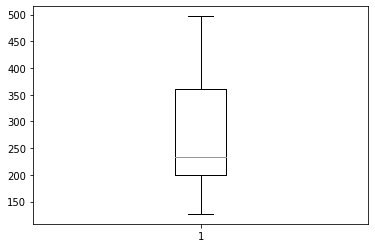

In [40]:
fig, ax = plt.subplots(1)

x9 =pp_graph["Prec"][0][0].to_numpy() 

ax.boxplot(x9)

Text(0.5, 1.0, 'Diagrama de cajas')

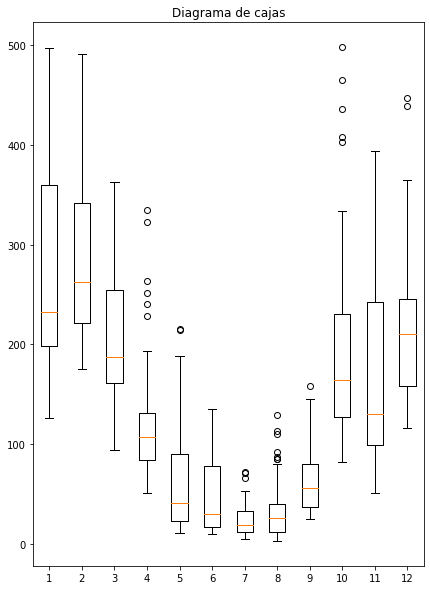

In [41]:
fig, ax = plt.subplots(figsize = (7, 10))

x1 = pp_graph["Prec"][0][0].to_numpy()
x2 = pp_graph["Prec"][1][0].to_numpy()
x3 = pp_graph["Prec"][2][0].to_numpy()
x4 = pp_graph["Prec"][3][0].to_numpy()
x5 = pp_graph["Prec"][4][0].to_numpy()
x6 = pp_graph["Prec"][5][0].to_numpy()
x7 = pp_graph["Prec"][6][0].to_numpy()
x8 = pp_graph["Prec"][7][0].to_numpy()
x9 = pp_graph["Prec"][8][0].to_numpy()
x10 = pp_graph["Prec"][9][0].to_numpy()
x11 = pp_graph["Prec"][10][0].to_numpy()
x12 = pp_graph["Prec"][11][0].to_numpy()
all_x = [x1,x2,x3,x4,x5,x6,x7,x8,x9, x10, x11, x12]
box= ax.boxplot(all_x)

ax.set_xsticks = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.title("Diagrama de cajas")

## Agrupar las 3 graficas en 1 

Text(0, 1, 'mm')

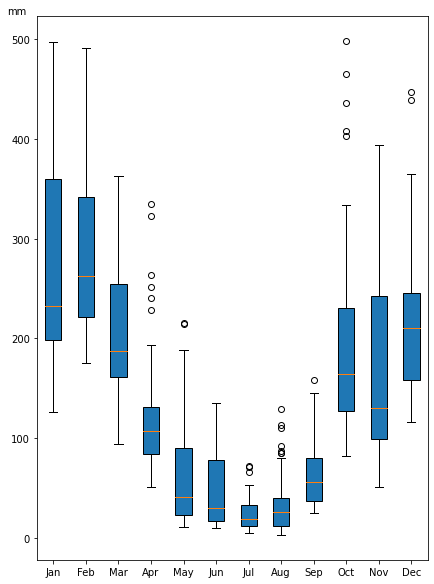

In [42]:
fig, ax = plt.subplots(figsize = (7, 10))

x1 = pp_graph["Prec"][0][0].to_numpy()
x2 = pp_graph["Prec"][1][0].to_numpy()
x3 = pp_graph["Prec"][2][0].to_numpy()
x4 = pp_graph["Prec"][3][0].to_numpy()
x5 = pp_graph["Prec"][4][0].to_numpy()
x6 = pp_graph["Prec"][5][0].to_numpy()
x7 = pp_graph["Prec"][6][0].to_numpy()
x8 = pp_graph["Prec"][7][0].to_numpy()
x9 = pp_graph["Prec"][8][0].to_numpy()
x10 = pp_graph["Prec"][9][0].to_numpy()
x11 = pp_graph["Prec"][10][0].to_numpy()
x12 = pp_graph["Prec"][11][0].to_numpy()
all_x = [x1,x2,x3,x4,x5,x6,x7,x8,x9, x10, x11, x12]

meses = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
box= ax.boxplot(all_x, patch_artist=True, labels=meses)
ax.set_ylabel("mm",rotation=0, ha='left', y=1)

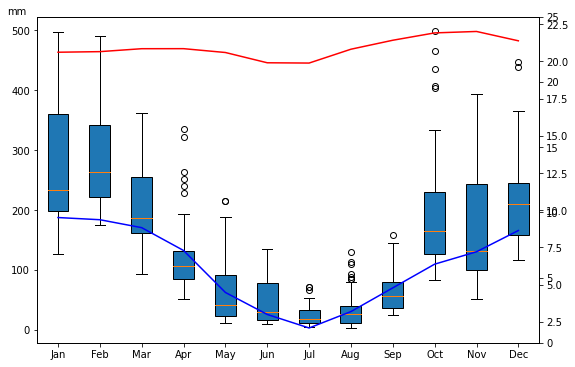

In [43]:
fig, ax = plt.subplots(figsize=(9, 6))
ax2 = ax.twinx()  
ax2.set_ylim(0, 25)

x1 = pp_graph["Prec"][0][0].to_numpy()
x2 = pp_graph["Prec"][1][0].to_numpy()
x3 = pp_graph["Prec"][2][0].to_numpy()
x4 = pp_graph["Prec"][3][0].to_numpy()
x5 = pp_graph["Prec"][4][0].to_numpy()
x6 = pp_graph["Prec"][5][0].to_numpy()
x7 = pp_graph["Prec"][6][0].to_numpy()
x8 = pp_graph["Prec"][7][0].to_numpy()
x9 = pp_graph["Prec"][8][0].to_numpy()
x10 = pp_graph["Prec"][9][0].to_numpy()
x11 = pp_graph["Prec"][10][0].to_numpy()
x12 = pp_graph["Prec"][11][0].to_numpy()
all_x = [x1,x2,x3,x4,x5,x6,x7,x8,x9, x10, x11, x12]

meses = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
box= ax.boxplot(all_x, patch_artist=True, labels=meses)
ax.set_ylabel("mm",rotation=0, ha='left', y=1)


ax2=ax.twinx()
x = np.arange(1,13)
ax2.plot(x,tmax_monthly["tx"].to_numpy(),label="Tmax", color="red")
ax2.plot(x,tmin_monthly["tmin"].to_numpy(),label="Tmin",color="blue")
plt.show()


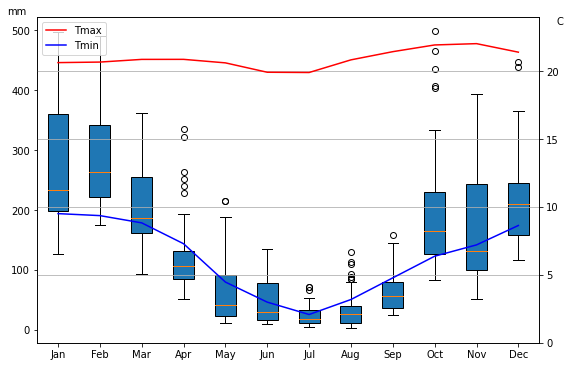

In [44]:
fig, ax = plt.subplots(figsize=(9, 6))
ax2 = ax.twinx()  
ax2.set_ylim(0, 24)

x1 = pp_graph["Prec"][0][0].to_numpy()
x2 = pp_graph["Prec"][1][0].to_numpy()
x3 = pp_graph["Prec"][2][0].to_numpy()
x4 = pp_graph["Prec"][3][0].to_numpy()
x5 = pp_graph["Prec"][4][0].to_numpy()
x6 = pp_graph["Prec"][5][0].to_numpy()
x7 = pp_graph["Prec"][6][0].to_numpy()
x8 = pp_graph["Prec"][7][0].to_numpy()
x9 = pp_graph["Prec"][8][0].to_numpy()
x10 = pp_graph["Prec"][9][0].to_numpy()
x11 = pp_graph["Prec"][10][0].to_numpy()
x12 = pp_graph["Prec"][11][0].to_numpy()
all_x = [x1,x2,x3,x4,x5,x6,x7,x8,x9, x10, x11, x12]

meses = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
box= ax.boxplot(all_x, patch_artist=True, labels=meses)
ax.set_ylabel("mm",rotation=0, ha='left', y=1)

ax2.plot(x,tmax_monthly["tx"].to_numpy(),label="Tmax", color="red")
ax2.plot(x,tmin_monthly["tmin"].to_numpy(),label="Tmin",color="blue")
ax2.set_ylabel("C",rotation=0, ha='right', y=1)
x = np.arange(1,13)
plt.legend()
plt.grid()
plt.show()

# Fig 2b: solo pp

In [45]:
pp_filtro=PISCO_pp.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
pp_filtro

<xarray.Dataset>
Dimensions:    (longitude: 133, time: 348, latitude: 198)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec       (time, latitude, longitude) float32 ...

In [46]:
PISCO_pp.Prec.sel(time= slice('1981-06-01', '2010-05-31')).groupby('time.year').sum('time')

<xarray.DataArray 'Prec' (year: 30, latitude: 198, longitude: 133)>
array([[[   0.      ,    0.      ,    0.      , ...,  994.2084  ,
         1043.0593  , 1101.3192  ],
        [   0.      ,    0.      ,    0.      , ..., 1018.895   ,
         1049.5127  , 1077.5139  ],
        [   0.      ,    0.      ,    0.      , ..., 1049.3593  ,
         1013.7041  ,  977.9512  ],
        ...,
        [   0.      ,    0.      ,    0.      , ...,   41.561672,
           39.169632,   45.424377],
        [   0.      ,    0.      ,    0.      , ...,   29.987413,
           33.39159 ,   45.978264],
        [   0.      ,    0.      ,    0.      , ...,   34.743805,
           41.898903,   50.07071 ]],

       [[   0.      ,    0.      ,    0.      , ..., 2474.8042  ,
         2518.4683  , 2659.6436  ],
        [   0.      ,    0.      ,    0.      , ..., 2675.805   ,
         2661.8223  , 2708.1816  ],
        [   0.      ,    0.      ,    0.      , ..., 2934.4756  ,
         2717.8533  , 2581.1477  ],
...
        [   0.      ,    0.      ,    0.      , ...,  211.76877 ,
          208.95207 ,  211.59549 ],
        [   0.      ,    0.      ,    0.      , ...,  206.45557 ,
          221.74542 ,  226.07474 ],
        [   0.      ,    0.      ,    0.      , ...,  204.16992 ,
          222.24806 ,  229.26826 ]],

       [[   0.      ,    0.      ,    0.      , ..., 1477.1238  ,
         1382.1067  , 1355.19    ],
        [   0.      ,    0.      ,    0.      , ..., 1559.2345  ,
         1461.3473  , 1425.2329  ],
        [   0.      ,    0.      ,    0.      , ..., 1718.6447  ,
         1522.8489  , 1431.9177  ],
        ...,
        [   0.      ,    0.      ,    0.      , ...,  163.48042 ,
          167.27264 ,  162.65227 ],
        [   0.      ,    0.      ,    0.      , ...,  168.22229 ,
          183.41705 ,  170.64815 ],
        [   0.      ,    0.      ,    0.      , ...,  152.9126  ,
          166.8662  ,  167.88297 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * year       (year) int64 1981 1982 1983 1984 1985 ... 2007 2008 2009 2010
Attributes:
    units:           mm/month
    long_name:       Precipitation
    maxncolor:       254
    ncolor:          254
    colormap:        [null 16777215 16777215 16777215 [16777215 3] 14155730 [...
    colorscalename:  precip_colors
    CS:              0
    scale_min:       0.0

In [47]:
pp_anual = PISCO_pp.Prec.sel(time= slice('1981-06-01', '2010-05-31')).groupby('time.year').sum('time').mean('year')
pp_anual

<xarray.DataArray 'Prec' (latitude: 198, longitude: 133)>
array([[   0.     ,    0.     ,    0.     , ..., 2531.0598 , 2531.214  ,
        2616.8142 ],
       [   0.     ,    0.     ,    0.     , ..., 2660.1724 , 2609.414  ,
        2636.197  ],
       [   0.     ,    0.     ,    0.     , ..., 2826.067  , 2607.9624 ,
        2496.631  ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,  238.14226,  228.89679,
         228.58232],
       [   0.     ,    0.     ,    0.     , ...,  234.98033,  242.60112,
         239.53636],
       [   0.     ,    0.     ,    0.     , ...,  220.42763,  230.70816,
         234.64705]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float32 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75

(-18.5, -12.55)

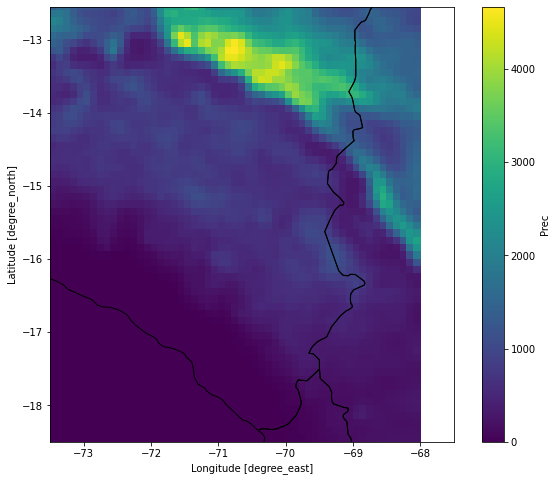

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
pp_anual.plot(ax=ax)
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

(-18.5, -12.55)

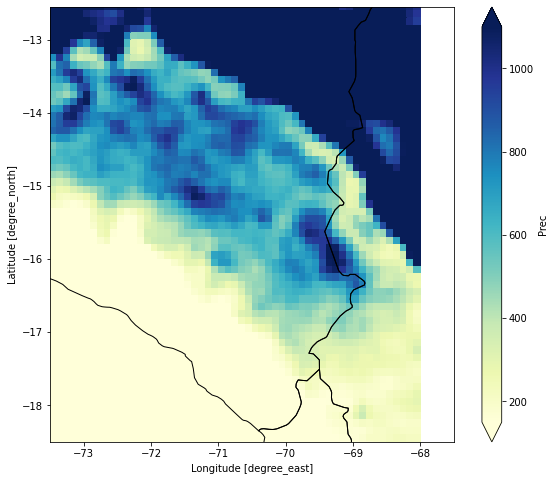

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
pp_anual.plot(ax=ax, cmap ="YlGnBu", vmin=150, vmax=1100)
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Fig 2c: tmax

In [50]:
tmax_filtro=PISCO_tmax.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmax_filtro

<xarray.Dataset>
Dimensions:    (longitude: 145, latitude: 202, time: 10592)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * time       (time) datetime64[ns] 1981-06-01 1981-06-02 ... 2010-05-31
Data variables:
    tx         (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4
    history:      Mon Nov 05 08:23:44 2018: cdo -r settaxis,1981-01-01,00:00:...
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-09-28 14:31:18
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [51]:
tmax_anual = tmax_filtro.mean(dim="time").tx
tmax_anual

<xarray.DataArray 'tx' (latitude: 202, longitude: 145)>
array([[       nan,        nan,        nan, ..., 31.75107  , 31.723167 ,
        31.767216 ],
       [       nan,        nan,        nan, ..., 31.775034 , 31.739435 ,
        31.77193  ],
       [       nan,        nan,        nan, ..., 31.765276 , 31.710793 ,
        31.723497 ],
       ...,
       [       nan,        nan,        nan, ..., 13.902001 , 13.2168665,
        14.534429 ],
       [       nan,        nan,        nan, ..., 13.883519 , 12.076271 ,
        12.907521 ],
       [       nan,        nan,        nan, ..., 13.997839 , 12.97728  ,
        11.620479 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
  * latitude   (latitude) float64 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75

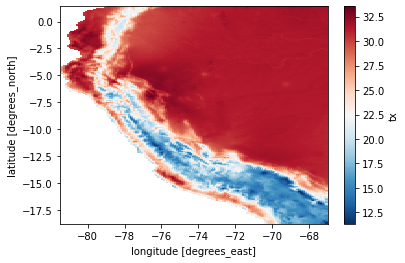

In [52]:
tmax_filtro.mean(dim="time").tx.plot(cmap="RdBu_r")

(-18.5, -12.55)

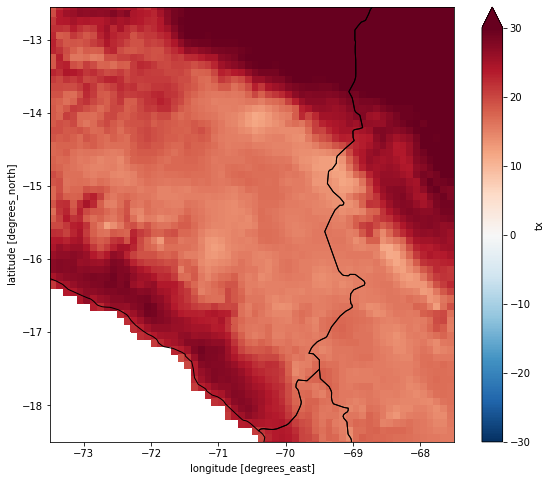

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
tmax_anual.plot(ax=ax,cmap="RdBu_r",vmin=-30,vmax=30)
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Fig 2d: tmin

In [54]:
tmin_filtro=PISCO_tmin.sel(time=slice('1981-06-01T00:00:00.000000000','2010-05-31T12:00:00.000000000'))
tmin_filtro

<xarray.Dataset>
Dimensions:    (time: 348, latitude: 202, longitude: 145)
Coordinates:
  * time       (time) datetime64[ns] 1981-06-30 1981-07-31 ... 2010-05-31
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05
Data variables:
    tmin       (time, latitude, longitude) float32 ...

In [55]:
tmin_anual = tmin_filtro.mean(dim="time").tmin
tmin_anual

<xarray.DataArray 'tmin' (latitude: 202, longitude: 145)>
array([[           nan,            nan,            nan, ...,
         2.2607193e+01,  2.2607384e+01,  2.2590492e+01],
       [           nan,            nan,            nan, ...,
         2.2564617e+01,  2.2567411e+01,  2.2552910e+01],
       [           nan,            nan,            nan, ...,
         2.2560677e+01,  2.2562449e+01,  2.2540043e+01],
       ...,
       [           nan,            nan,            nan, ...,
        -3.6914144e-03,  1.0238912e+00, -8.6790204e-01],
       [           nan,            nan,            nan, ...,
        -4.2399839e-01,  2.0936773e+00,  7.3462516e-01],
       [           nan,            nan,            nan, ...,
        -1.1116940e+00,  5.8724785e-01,  2.6027920e+00]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 1.35 1.25 1.15 1.05 ... -18.55 -18.65 -18.75
  * longitude  (longitude) float32 -81.45 -81.35 -81.25 ... -67.25 -67.15 -67.05

(-18.5, -12.55)

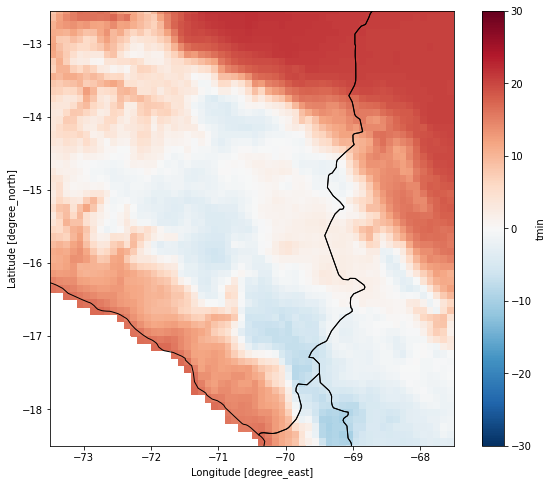

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
tmin_anual.plot(ax=ax,cmap="RdBu_r", vmin=-30,vmax=30)
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# TODO JUNTO

Text(0.0, 1.0, '(d)')

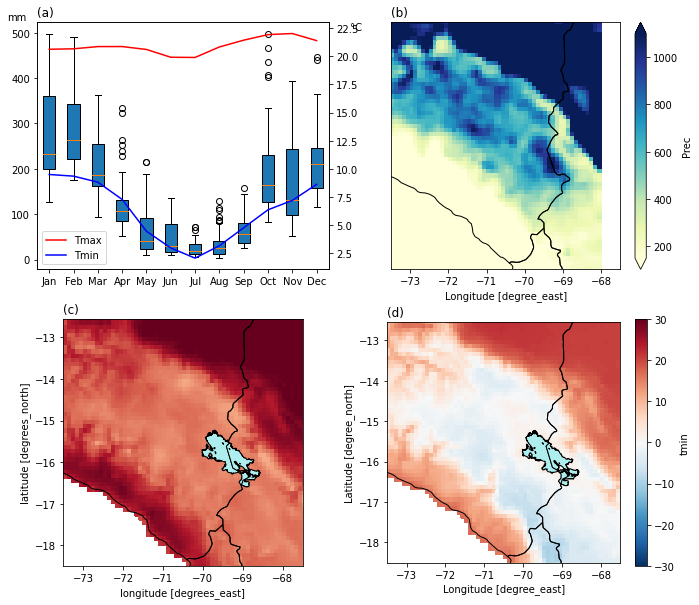

In [57]:
from mpl_toolkits.mplot3d import axes3d
fig, axs = plt.subplots(2, 2, figsize=(11.5, 10))

#DIAGRAMA CLIMATOLOGICO
x1 = pp_graph["Prec"][0][0].to_numpy()
x2 = pp_graph["Prec"][1][0].to_numpy()
x3 = pp_graph["Prec"][2][0].to_numpy()
x4 = pp_graph["Prec"][3][0].to_numpy()
x5 = pp_graph["Prec"][4][0].to_numpy()
x6 = pp_graph["Prec"][5][0].to_numpy()
x7 = pp_graph["Prec"][6][0].to_numpy()
x8 = pp_graph["Prec"][7][0].to_numpy()
x9 = pp_graph["Prec"][8][0].to_numpy()
x10 = pp_graph["Prec"][9][0].to_numpy()
x11 = pp_graph["Prec"][10][0].to_numpy()
x12 = pp_graph["Prec"][11][0].to_numpy()
all_x = [x1,x2,x3,x4,x5,x6,x7,x8,x9, x10, x11, x12]
meses = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
#diagrama de cajas de pp
axs[0, 0].boxplot(all_x, patch_artist=True, labels=meses)
axs[0, 0].set_ylabel("mm",rotation=0, ha='left', y=1)
#tmax y tmin
ax1=axs[0, 0].twinx()
x = np.arange(1,13)
ax1.plot(x,tmax_monthly["tx"].to_numpy(),label="Tmax", color="red")
ax1.plot(x,tmin_monthly["tmin"].to_numpy(),label="Tmin",color="blue")
ax1.set_ylabel("°C",rotation=0, ha='right', y=1)

axs[0, 0].set_title('(a)', loc='left')
plt.legend()

#DIAGRAMA 2
ax2 = axs[0, 1]
pp_anual.plot(ax=ax2, cmap ="YlGnBu", vmin=150, vmax=1100)
lugar = Sudamerica.plot(ax=ax2,facecolor="none",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax2.set_xlim(minx, maxx)
ax2.set_ylim(miny, maxy)
ax2.set_ylabel("")
ax2.set_yticks([])
axs[0, 1].set_title('(b)', loc='left')

#DIAGRAMA 3
ax3 = axs[1, 0]
tmax_anual.plot(ax=ax3,cmap="RdBu_r",vmin=-30,vmax=30, add_colorbar=False)
lugar = Sudamerica.plot(ax=ax3,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax3,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax3.set_xlim(minx, maxx)
ax3.set_ylim(miny, maxy)
axs[1, 0].set_title('(c)', loc='left')


#DIAGRAMA 4
ax4 = axs[1, 1]
tmin_anual.plot(ax=ax4,cmap="RdBu_r", vmin=-30,vmax=30)
lugar = Sudamerica.plot(ax=ax4,facecolor="none",edgecolor="black")
lago = lago_titicaca.plot(ax=ax4,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.5, -18.5, -67.5, -12.55
ax4.set_xlim(minx, maxx)
ax4.set_ylim(miny, maxy)
axs[1, 1].set_title('(d)', loc='left')